Includes:

Data exploration

Indentifying regions and years for which there are cotton yield records

Data cleaning

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Demand

In [3]:
df = pd.read_excel("MDBWaterMarketCatchmentDataset_Demand_v1.0.0.xlsx", sheet_name = "Demand - Production and Value")
df

,Year,MDB,Region,Industry,Production,Units_Q,Q_meta,Commodity_price,Units_Y,GVIAP,G_meta
0,2006,sMDB,ACT,Almonds,NaN,tonnes,6,11510.189578,$/t,NaN,6
1,2007,sMDB,ACT,Almonds,NaN,tonnes,6,9582.048331,$/t,NaN,6
2,2008,sMDB,ACT,Almonds,NaN,tonnes,6,5448.615046,$/t,NaN,6
3,2009,sMDB,ACT,Almonds,NaN,tonnes,6,6118.056680,$/t,NaN,6
4,2010,sMDB,ACT,Almonds,NaN,tonnes,6,5008.225837,$/t,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...
4120,2016,sMDB,VIC Wimmera-Avon,Vegetables,63501.577053,Quantity Index,7,184.627502,Index,1.172414e+07,2
4121,2017,sMDB,VIC Wimmera-Avon,Vegetables,38775.104679,Quantity Index,7,184.626973,Index,7.158930e+06,2
4122,2018,sMDB,VIC Wimmera-Avon,Vegetables,9378.792339,Quantity Index,7,184.626354,Index,1.731572e+06,2
4123,2019,sMDB,VIC Wimmera-Avon,Vegetables,9517.699503,Quantity Index,7,184.627866,Index,1.757233e+06,2


In [4]:
cotton_only = df[df["Industry"] == "Cotton"].copy().reindex()

In [5]:
cotton_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 15 to 3989
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             375 non-null    int64  
 1   MDB              375 non-null    object 
 2   Region           375 non-null    object 
 3   Industry         375 non-null    object 
 4   Production       331 non-null    float64
 5   Units_Q          375 non-null    object 
 6   Q_meta           375 non-null    int64  
 7   Commodity_price  375 non-null    float64
 8   Units_Y          375 non-null    object 
 9   GVIAP            331 non-null    float64
 10  G_meta           375 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 35.2+ KB


In [6]:
cotton_only["Region"].value_counts()

Region
NSW Lower Darling            15
NSW Murray Above             15
ACT                          15
Eastern Mt Lofty             15
NSW Barwon Darling           15
NSW Border Rivers            15
NSW Gwydir                   15
NSW Lachlan                  15
NSW Macquarie-Castlereagh    15
NSW Murray Below             15
NSW Murrumbidgee             15
NSW Namoi                    15
QLD Border Rivers            15
QLD Condamine-Balonne        15
QLD Moonie                   15
QLD Warrego-Paroo            15
SA Adelaide and Mt Lofty     15
SA Murray                    15
VIC Goulburn-Broken          15
VIC Loddon-Campaspe          15
VIC Murray Above             15
VIC Murray Below             15
VIC Ovens                    15
VIC Werribee                 15
VIC Wimmera-Avon             15
Name: count, dtype: int64

In [7]:
cotton_only[cotton_only["Production"] == 0.0].groupby("Region").count()

,Year,MDB,Industry,Production,Units_Q,Q_meta,Commodity_price,Units_Y,GVIAP,G_meta
Region,,,,,,,,,,
ACT,9,9,9,9,9,9,9,9,9,9
Eastern Mt Lofty,9,9,9,9,9,9,9,9,9,9
NSW Lower Darling,5,5,5,5,5,5,5,5,5,5
NSW Murray Below,15,15,15,15,15,15,15,15,15,15
QLD Warrego-Paroo,6,6,6,6,6,6,6,6,6,6
SA Adelaide and Mt Lofty,9,9,9,9,9,9,9,9,9,9
SA Murray,15,15,15,15,15,15,15,15,15,15
VIC Goulburn-Broken,15,15,15,15,15,15,15,15,15,15
VIC Loddon-Campaspe,15,15,15,15,15,15,15,15,15,15


In [8]:
cotton_only["Production"].replace({np.nan : 0.0})
cotton_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 15 to 3989
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             375 non-null    int64  
 1   MDB              375 non-null    object 
 2   Region           375 non-null    object 
 3   Industry         375 non-null    object 
 4   Production       331 non-null    float64
 5   Units_Q          375 non-null    object 
 6   Q_meta           375 non-null    int64  
 7   Commodity_price  375 non-null    float64
 8   Units_Y          375 non-null    object 
 9   GVIAP            331 non-null    float64
 10  G_meta           375 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 35.2+ KB


In [9]:
cotton_only["Production"].value_counts()

Production
0.000000        155
14704.861175      1
213.352283        1
136.758036        1
43.111764         1
               ... 
6935.890288       1
5022.718000       1
1155.018106       1
148.468153        1
12854.871520      1
Name: count, Length: 177, dtype: int64

In [10]:
counters = pd.DataFrame(columns = ['Region', "Sum", "Count"])

In [11]:
for reg in cotton_only.Region.unique():
    #print(reg, cotton_only[cotton_only["Region"] == reg]["Production"].sum(), cotton_only[cotton_only["Region"] == reg]["Production"].count())
    new_row = {'Region' : reg, "Sum" : cotton_only[cotton_only["Region"] == reg]["Production"].sum(), "Count" : cotton_only[cotton_only["Region"] == reg]["Production"].count()}
    counters.loc[len(counters)] = new_row

In [12]:
counters[(counters["Sum"].notna()) & (counters["Sum"] > 0.0)]["Count"].sum()

np.int64(187)

In [13]:
counters[(counters["Sum"].notna()) & (counters["Sum"] > 0.0)]

,Region,Sum,Count
0,NSW Lower Darling,8.823272e+04,15
1,NSW Murray Above,9.811814e+03,15
4,NSW Barwon Darling,6.289914e+05,15
5,NSW Border Rivers,6.669506e+05,15
6,NSW Gwydir,8.924750e+05,15
7,NSW Lachlan,2.548861e+05,15
8,NSW Macquarie-Castlereagh,6.152535e+05,15
10,NSW Murrumbidgee,6.340118e+05,15
11,NSW Namoi,1.136683e+06,15
12,QLD Border Rivers,7.034661e+05,15


In [14]:
notnulls = counters[(counters["Sum"].notna()) & (counters["Sum"] > 0.0)].copy()

In [15]:
notnulls['Region']

0             NSW Lower Darling
1              NSW Murray Above
4            NSW Barwon Darling
5             NSW Border Rivers
6                    NSW Gwydir
7                   NSW Lachlan
8     NSW Macquarie-Castlereagh
10             NSW Murrumbidgee
11                    NSW Namoi
12            QLD Border Rivers
13        QLD Condamine-Balonne
14                   QLD Moonie
15            QLD Warrego-Paroo
Name: Region, dtype: object

In [16]:
actual_data = cotton_only[cotton_only["Region"].isin(list(notnulls['Region']))].copy()
actual_data.head()

,Year,MDB,Region,Industry,Production,Units_Q,Q_meta,Commodity_price,Units_Y,GVIAP,G_meta
15,2006,sMDB,NSW Lower Darling,Cotton,0.000000,tonnes,7,2283.561906,$/t,0.000000e+00,7
16,2011,sMDB,NSW Lower Darling,Cotton,14704.861175,tonnes,4,2648.423522,$/t,3.894470e+07,4
17,2006,sMDB,NSW Murray Above,Cotton,213.352283,tonnes,4,2283.561906,$/t,4.872031e+05,4
18,2007,sMDB,NSW Murray Above,Cotton,136.758036,tonnes,4,2391.134567,$/t,3.270069e+05,4
19,2008,sMDB,NSW Murray Above,Cotton,43.111764,tonnes,4,2459.105979,$/t,1.060164e+05,4


In [17]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 15 to 2504
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             195 non-null    int64  
 1   MDB              195 non-null    object 
 2   Region           195 non-null    object 
 3   Industry         195 non-null    object 
 4   Production       187 non-null    float64
 5   Units_Q          195 non-null    object 
 6   Q_meta           195 non-null    int64  
 7   Commodity_price  195 non-null    float64
 8   Units_Y          195 non-null    object 
 9   GVIAP            187 non-null    float64
 10  G_meta           195 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 18.3+ KB


In [18]:
actual_data['Year'].value_counts()

Year
2006    13
2011    13
2007    13
2008    13
2009    13
2010    13
2012    13
2013    13
2014    13
2015    13
2016    13
2017    13
2018    13
2019    13
2020    13
Name: count, dtype: int64

In [19]:
for feature in actual_data.columns:
    print(feature, len(actual_data[f"{feature}"].unique()))

Year 15
MDB 2
Region 13
Industry 1
Production 178
Units_Q 1
Q_meta 4
Commodity_price 15
Units_Y 1
GVIAP 178
G_meta 4


In [20]:
actual_data.drop(["Industry", "Units_Q", "Units_Y"], axis = 1, inplace = True)

In [21]:
actual_data.head()

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta
15,2006,sMDB,NSW Lower Darling,0.000000,7,2283.561906,0.000000e+00,7
16,2011,sMDB,NSW Lower Darling,14704.861175,4,2648.423522,3.894470e+07,4
17,2006,sMDB,NSW Murray Above,213.352283,4,2283.561906,4.872031e+05,4
18,2007,sMDB,NSW Murray Above,136.758036,4,2391.134567,3.270069e+05,4
19,2008,sMDB,NSW Murray Above,43.111764,4,2459.105979,1.060164e+05,4


In [22]:
def is_zero(x):
    if x == 0.0:
        return 1
    else:
        return 0

In [23]:
actual_data["Missing Production"] = actual_data["Production"].apply(is_zero)
actual_data["Missing Production"].sum()

np.int64(11)

In [24]:
actual_data[actual_data["Missing Production"] == 1]["Region"].value_counts()

Region
QLD Warrego-Paroo    6
NSW Lower Darling    5
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'NSW Lower Darling'),
  Text(1, 0, 'NSW Murray Above'),
  Text(2, 0, 'NSW Barwon Darling'),
  Text(3, 0, 'NSW Border Rivers'),
  Text(4, 0, 'NSW Gwydir'),
  Text(5, 0, 'NSW Lachlan'),
  Text(6, 0, 'NSW Macquarie-Castlereagh'),
  Text(7, 0, 'NSW Murrumbidgee'),
  Text(8, 0, 'NSW Namoi'),
  Text(9, 0, 'QLD Border Rivers'),
  Text(10, 0, 'QLD Condamine-Balonne'),
  Text(11, 0, 'QLD Moonie'),
  Text(12, 0, 'QLD Warrego-Paroo')])

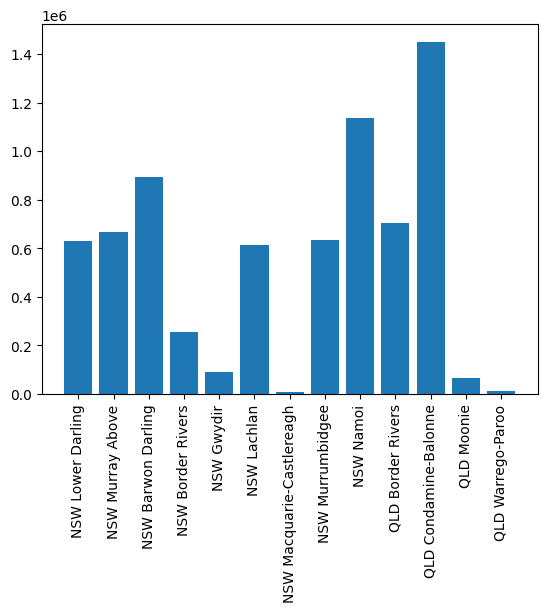

In [25]:
plt.bar(x = actual_data["Region"].unique(), height = actual_data.groupby("Region")["Production"].sum())
plt.xticks(rotation = 90)

In [26]:
actual_data[actual_data["Region"] == "NSW Lower Darling"]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production
15,2006,sMDB,NSW Lower Darling,0.000000,7,2283.561906,0.000000e+00,7,1
16,2011,sMDB,NSW Lower Darling,14704.861175,4,2648.423522,3.894470e+07,4,0
1012,2007,sMDB,NSW Lower Darling,0.000000,7,2391.134567,0.000000e+00,2,1
1013,2008,sMDB,NSW Lower Darling,0.000000,7,2459.105979,0.000000e+00,2,1
1014,2009,sMDB,NSW Lower Darling,0.000000,7,2629.558525,0.000000e+00,2,1
1015,2010,sMDB,NSW Lower Darling,0.000000,7,2613.360268,0.000000e+00,2,1
1016,2012,sMDB,NSW Lower Darling,13393.000000,1,2785.558460,3.730698e+07,7,0
1017,2013,sMDB,NSW Lower Darling,16425.720000,1,2394.873759,3.933753e+07,7,0
1018,2014,sMDB,NSW Lower Darling,18996.435430,1,2493.266841,4.736318e+07,7,0
1019,2015,sMDB,NSW Lower Darling,17479.000000,1,2427.937221,4.243791e+07,7,0


In [27]:
actual_data[actual_data["Region"] == "QLD Warrego-Paroo"]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production
2490,2006,nMDB,QLD Warrego-Paroo,NaN,6,2283.561906,NaN,6,0
2491,2007,nMDB,QLD Warrego-Paroo,NaN,6,2391.134567,NaN,6,0
2492,2008,nMDB,QLD Warrego-Paroo,0.00000,7,2459.105979,0.000000e+00,2,1
2493,2009,nMDB,QLD Warrego-Paroo,0.00000,7,2629.558525,0.000000e+00,2,1
2494,2010,nMDB,QLD Warrego-Paroo,NaN,6,2613.360268,NaN,6,0
2495,2011,nMDB,QLD Warrego-Paroo,12854.87152,1,2648.423522,3.404514e+07,7,0
2496,2012,nMDB,QLD Warrego-Paroo,0.00000,7,2785.558460,0.000000e+00,2,1
2497,2013,nMDB,QLD Warrego-Paroo,0.00000,7,2394.873759,0.000000e+00,2,1
2498,2014,nMDB,QLD Warrego-Paroo,NaN,6,2493.266841,NaN,6,0
2499,2015,nMDB,QLD Warrego-Paroo,NaN,6,2427.937221,NaN,6,0


In [28]:
actual_data[(actual_data.Production.isna()) | (actual_data.Production == 0.0)].groupby("Region").count()

,Year,MDB,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production
Region,,,,,,,,
NSW Lower Darling,5,5,5,5,5,5,5,5
QLD Warrego-Paroo,14,14,6,14,14,6,14,14


In [29]:
len(actual_data['Year'].unique())

15

In [30]:
len(actual_data['Region'].unique())

13

Dropping rows from QLD Warrego-Paroo region since it has only one datapoint

In [31]:
actual_data = actual_data[actual_data["Region"] != "QLD Warrego-Paroo"]

In [32]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 15 to 2339
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                180 non-null    int64  
 1   MDB                 180 non-null    object 
 2   Region              180 non-null    object 
 3   Production          180 non-null    float64
 4   Q_meta              180 non-null    int64  
 5   Commodity_price     180 non-null    float64
 6   GVIAP               180 non-null    float64
 7   G_meta              180 non-null    int64  
 8   Missing Production  180 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 14.1+ KB


In [33]:
actual_data[actual_data['Production'] == 0.0]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production
15,2006,sMDB,NSW Lower Darling,0.0,7,2283.561906,0.0,7,1
1012,2007,sMDB,NSW Lower Darling,0.0,7,2391.134567,0.0,2,1
1013,2008,sMDB,NSW Lower Darling,0.0,7,2459.105979,0.0,2,1
1014,2009,sMDB,NSW Lower Darling,0.0,7,2629.558525,0.0,2,1
1015,2010,sMDB,NSW Lower Darling,0.0,7,2613.360268,0.0,2,1


In [34]:
actual_data[actual_data['Region'] == "NSW Lower Darling"]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production
15,2006,sMDB,NSW Lower Darling,0.000000,7,2283.561906,0.000000e+00,7,1
16,2011,sMDB,NSW Lower Darling,14704.861175,4,2648.423522,3.894470e+07,4,0
1012,2007,sMDB,NSW Lower Darling,0.000000,7,2391.134567,0.000000e+00,2,1
1013,2008,sMDB,NSW Lower Darling,0.000000,7,2459.105979,0.000000e+00,2,1
1014,2009,sMDB,NSW Lower Darling,0.000000,7,2629.558525,0.000000e+00,2,1
1015,2010,sMDB,NSW Lower Darling,0.000000,7,2613.360268,0.000000e+00,2,1
1016,2012,sMDB,NSW Lower Darling,13393.000000,1,2785.558460,3.730698e+07,7,0
1017,2013,sMDB,NSW Lower Darling,16425.720000,1,2394.873759,3.933753e+07,7,0
1018,2014,sMDB,NSW Lower Darling,18996.435430,1,2493.266841,4.736318e+07,7,0
1019,2015,sMDB,NSW Lower Darling,17479.000000,1,2427.937221,4.243791e+07,7,0


In [35]:
actual_data.Region.unique()

array(['NSW Lower Darling', 'NSW Murray Above', 'NSW Barwon Darling',
       'NSW Border Rivers', 'NSW Gwydir', 'NSW Lachlan',
       'NSW Macquarie-Castlereagh', 'NSW Murrumbidgee', 'NSW Namoi',
       'QLD Border Rivers', 'QLD Condamine-Balonne', 'QLD Moonie'],
      dtype=object)

In [36]:
actual_data.reset_index(inplace = True, drop = True)
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                180 non-null    int64  
 1   MDB                 180 non-null    object 
 2   Region              180 non-null    object 
 3   Production          180 non-null    float64
 4   Q_meta              180 non-null    int64  
 5   Commodity_price     180 non-null    float64
 6   GVIAP               180 non-null    float64
 7   G_meta              180 non-null    int64  
 8   Missing Production  180 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 12.8+ KB


### Demand Water

In [37]:
water_use = df = pd.read_excel("MDBWaterMarketCatchmentDataset_Demand_v1.0.0.xlsx", sheet_name = "Demand - Area and Water use")
water_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            3375 non-null   int64  
 1   MDB             3375 non-null   object 
 2   Region          3375 non-null   object 
 3   Industry        3375 non-null   object 
 4   Area_watered    2454 non-null   float64
 5   L_meta          3375 non-null   int64  
 6   Volume_applied  2446 non-null   float64
 7   W_meta          3375 non-null   int64  
 8   Tree_br         168 non-null    float64
 9   Tree_nbr        156 non-null    float64
 10  K_Almonds       189 non-null    float64
 11  K_meta          375 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 316.5+ KB


In [38]:
water_use = water_use[water_use["Industry"] == "Cotton"].copy()

In [39]:
regions_water_use = water_use[water_use.Region.isin(actual_data.Region.unique())].copy()
regions_water_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 300 to 1934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            180 non-null    int64  
 1   MDB             180 non-null    object 
 2   Region          180 non-null    object 
 3   Industry        180 non-null    object 
 4   Area_watered    176 non-null    float64
 5   L_meta          180 non-null    int64  
 6   Volume_applied  178 non-null    float64
 7   W_meta          180 non-null    int64  
 8   Tree_br         0 non-null      float64
 9   Tree_nbr        0 non-null      float64
 10  K_Almonds       0 non-null      float64
 11  K_meta          0 non-null      float64
dtypes: float64(6), int64(3), object(3)
memory usage: 18.3+ KB


In [40]:
regions_water_use.groupby("Region")["Area_watered"].count()

Region
NSW Barwon Darling           15
NSW Border Rivers            15
NSW Gwydir                   15
NSW Lachlan                  15
NSW Lower Darling            15
NSW Macquarie-Castlereagh    15
NSW Murray Above             15
NSW Murrumbidgee             15
NSW Namoi                    15
QLD Border Rivers            14
QLD Condamine-Balonne        13
QLD Moonie                   14
Name: Area_watered, dtype: int64

In [41]:
regions_water_use[(regions_water_use["Area_watered"].isna()) | (regions_water_use["Area_watered"] == 0.0)]

,Year,MDB,Region,Industry,Area_watered,L_meta,Volume_applied,W_meta,Tree_br,Tree_nbr,K_Almonds,K_meta
840,2006,sMDB,NSW Lower Darling,Cotton,0.0,7,0.000000,7,NaN,NaN,NaN,NaN
841,2007,sMDB,NSW Lower Darling,Cotton,0.0,2,0.000000,2,NaN,NaN,NaN,NaN
842,2008,sMDB,NSW Lower Darling,Cotton,0.0,2,0.000000,2,NaN,NaN,NaN,NaN
843,2009,sMDB,NSW Lower Darling,Cotton,0.0,2,0.000000,2,NaN,NaN,NaN,NaN
844,2010,sMDB,NSW Lower Darling,Cotton,0.0,2,0.000000,2,NaN,NaN,NaN,NaN
1654,2010,nMDB,QLD Border Rivers,Cotton,NaN,6,71090.938030,2,NaN,NaN,NaN,NaN
1788,2009,nMDB,QLD Condamine-Balonne,Cotton,NaN,6,NaN,6,NaN,NaN,NaN,NaN
1789,2010,nMDB,QLD Condamine-Balonne,Cotton,NaN,6,NaN,6,NaN,NaN,NaN,NaN
1924,2010,nMDB,QLD Moonie,Cotton,NaN,6,12267.125745,2,NaN,NaN,NaN,NaN


In [42]:
regions_water_use["Area_watered"].replace({np.nan : 0.0}, inplace = True)
regions_water_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 300 to 1934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            180 non-null    int64  
 1   MDB             180 non-null    object 
 2   Region          180 non-null    object 
 3   Industry        180 non-null    object 
 4   Area_watered    180 non-null    float64
 5   L_meta          180 non-null    int64  
 6   Volume_applied  178 non-null    float64
 7   W_meta          180 non-null    int64  
 8   Tree_br         0 non-null      float64
 9   Tree_nbr        0 non-null      float64
 10  K_Almonds       0 non-null      float64
 11  K_meta          0 non-null      float64
dtypes: float64(6), int64(3), object(3)
memory usage: 18.3+ KB


C:\Users\Dima\AppData\Local\Temp\ipykernel_33620\1009739546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  regions_water_use["Area_watered"].replace({np.nan : 0.0}, inplace = True)


In [43]:
regions_water_use[(regions_water_use["Volume_applied"].isna()) | (regions_water_use["Volume_applied"] == 0.0)]

,Year,MDB,Region,Industry,Area_watered,L_meta,Volume_applied,W_meta,Tree_br,Tree_nbr,K_Almonds,K_meta
840,2006,sMDB,NSW Lower Darling,Cotton,0.0,7,0.0,7,NaN,NaN,NaN,NaN
841,2007,sMDB,NSW Lower Darling,Cotton,0.0,2,0.0,2,NaN,NaN,NaN,NaN
842,2008,sMDB,NSW Lower Darling,Cotton,0.0,2,0.0,2,NaN,NaN,NaN,NaN
843,2009,sMDB,NSW Lower Darling,Cotton,0.0,2,0.0,2,NaN,NaN,NaN,NaN
844,2010,sMDB,NSW Lower Darling,Cotton,0.0,2,0.0,2,NaN,NaN,NaN,NaN
1788,2009,nMDB,QLD Condamine-Balonne,Cotton,0.0,6,NaN,6,NaN,NaN,NaN,NaN
1789,2010,nMDB,QLD Condamine-Balonne,Cotton,0.0,6,NaN,6,NaN,NaN,NaN,NaN


In [44]:
set(regions_water_use.Region.unique()) ^ set(actual_data.Region.unique())

set()

In [45]:
regions_water_use.groupby("Region")["Area_watered"].sum()

Region
NSW Barwon Darling           297347.491707
NSW Border Rivers            305207.272438
NSW Gwydir                   349536.859360
NSW Lachlan                  104989.681578
NSW Lower Darling             40875.215492
NSW Macquarie-Castlereagh    247893.313788
NSW Murray Above               4819.748276
NSW Murrumbidgee             317941.920355
NSW Namoi                    517736.466785
QLD Border Rivers            276964.633152
QLD Condamine-Balonne        655332.384959
QLD Moonie                    29529.285454
Name: Area_watered, dtype: float64

In [46]:
regions_water_use["L_meta"].value_counts()

L_meta
1    93
2    72
4    10
6     4
7     1
Name: count, dtype: int64

In [47]:
regions_water_use.Year.value_counts()

Year
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
Name: count, dtype: int64

Dropping MDB column since it is present in the other dataset. "Tree_br", "Tree_nbr", "K_Almond", "K_meta" are dropped since they do not contain any usable data

In [48]:
regions_water_use.drop(["Industry", "MDB", "Tree_br", "Tree_nbr", "K_Almonds", "K_meta"], axis = 1, inplace = True)
regions_water_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 300 to 1934
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            180 non-null    int64  
 1   Region          180 non-null    object 
 2   Area_watered    180 non-null    float64
 3   L_meta          180 non-null    int64  
 4   Volume_applied  178 non-null    float64
 5   W_meta          180 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 9.8+ KB


In [49]:
regions_water_use.reset_index(inplace = True, drop = True)
regions_water_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            180 non-null    int64  
 1   Region          180 non-null    object 
 2   Area_watered    180 non-null    float64
 3   L_meta          180 non-null    int64  
 4   Volume_applied  178 non-null    float64
 5   W_meta          180 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 8.6+ KB


### Combining

In [50]:
actual_data

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production
0,2006,sMDB,NSW Lower Darling,0.000000,7,2283.561906,0.000000e+00,7,1
1,2011,sMDB,NSW Lower Darling,14704.861175,4,2648.423522,3.894470e+07,4,0
2,2006,sMDB,NSW Murray Above,213.352283,4,2283.561906,4.872031e+05,4,0
3,2007,sMDB,NSW Murray Above,136.758036,4,2391.134567,3.270069e+05,4,0
4,2008,sMDB,NSW Murray Above,43.111764,4,2459.105979,1.060164e+05,4,0
...,...,...,...,...,...,...,...,...,...
175,2016,nMDB,QLD Moonie,932.600000,1,2597.290254,2.422233e+06,7,0
176,2017,nMDB,QLD Moonie,6935.890288,1,2279.040994,1.580718e+07,7,0
177,2018,nMDB,QLD Moonie,5022.718000,1,2722.869025,1.367620e+07,7,0
178,2019,nMDB,QLD Moonie,1155.018106,7,2764.340623,3.192863e+06,2,0


In [51]:
regions_water_use

,Year,Region,Area_watered,L_meta,Volume_applied,W_meta
0,2006,NSW Barwon Darling,31006.514096,2,214441.653996,2
1,2007,NSW Barwon Darling,14751.023058,2,103243.054259,2
2,2008,NSW Barwon Darling,3600.725494,2,19663.277923,2
3,2009,NSW Barwon Darling,11593.138158,2,82823.860566,2
4,2010,NSW Barwon Darling,16952.793511,2,108366.867258,2
...,...,...,...,...,...,...
175,2016,QLD Moonie,703.640000,1,5821.470000,1
176,2017,QLD Moonie,3107.980000,1,19394.950000,1
177,2018,QLD Moonie,2027.000000,1,17519.000000,1
178,2019,QLD Moonie,504.165829,2,4173.387461,2


In [52]:
full_df = pd.merge(actual_data, regions_water_use, on = ["Year", "Region"], how = "inner")
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                180 non-null    int64  
 1   MDB                 180 non-null    object 
 2   Region              180 non-null    object 
 3   Production          180 non-null    float64
 4   Q_meta              180 non-null    int64  
 5   Commodity_price     180 non-null    float64
 6   GVIAP               180 non-null    float64
 7   G_meta              180 non-null    int64  
 8   Missing Production  180 non-null    int64  
 9   Area_watered        180 non-null    float64
 10  L_meta              180 non-null    int64  
 11  Volume_applied      178 non-null    float64
 12  W_meta              180 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 18.4+ KB


In [53]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                180 non-null    int64  
 1   MDB                 180 non-null    object 
 2   Region              180 non-null    object 
 3   Production          180 non-null    float64
 4   Q_meta              180 non-null    int64  
 5   Commodity_price     180 non-null    float64
 6   GVIAP               180 non-null    float64
 7   G_meta              180 non-null    int64  
 8   Missing Production  180 non-null    int64  
 9   Area_watered        180 non-null    float64
 10  L_meta              180 non-null    int64  
 11  Volume_applied      178 non-null    float64
 12  W_meta              180 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 18.4+ KB


In [54]:
full_df["Region"].unique()

array(['NSW Lower Darling', 'NSW Murray Above', 'NSW Barwon Darling',
       'NSW Border Rivers', 'NSW Gwydir', 'NSW Lachlan',
       'NSW Macquarie-Castlereagh', 'NSW Murrumbidgee', 'NSW Namoi',
       'QLD Border Rivers', 'QLD Condamine-Balonne', 'QLD Moonie'],
      dtype=object)

In [55]:
len(full_df["Region"].unique())

12

In [56]:
full_df.replace({0.0 : np.nan}, inplace = True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                180 non-null    int64  
 1   MDB                 180 non-null    object 
 2   Region              180 non-null    object 
 3   Production          175 non-null    float64
 4   Q_meta              180 non-null    int64  
 5   Commodity_price     180 non-null    float64
 6   GVIAP               175 non-null    float64
 7   G_meta              180 non-null    int64  
 8   Missing Production  5 non-null      float64
 9   Area_watered        171 non-null    float64
 10  L_meta              180 non-null    int64  
 11  Volume_applied      173 non-null    float64
 12  W_meta              180 non-null    int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 18.4+ KB


In [57]:
full_df["Missing Production"].replace({np.nan : 0},inplace=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                180 non-null    int64  
 1   MDB                 180 non-null    object 
 2   Region              180 non-null    object 
 3   Production          175 non-null    float64
 4   Q_meta              180 non-null    int64  
 5   Commodity_price     180 non-null    float64
 6   GVIAP               175 non-null    float64
 7   G_meta              180 non-null    int64  
 8   Missing Production  180 non-null    float64
 9   Area_watered        171 non-null    float64
 10  L_meta              180 non-null    int64  
 11  Volume_applied      173 non-null    float64
 12  W_meta              180 non-null    int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 18.4+ KB


C:\Users\Dima\AppData\Local\Temp\ipykernel_33620\1374515032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df["Missing Production"].replace({np.nan : 0},inplace=True)


In [58]:
def is_missing(x):
    if np.isnan(x):
        return 1
    else:
        return 0

In [59]:
full_df["Missing Area_watered"] = full_df['Area_watered'].apply(is_missing)
full_df["Missing Area_watered"].sum()

np.int64(9)

In [60]:
full_df["Missing Volume_applied"] = full_df['Volume_applied'].apply(is_missing)
full_df["Missing Volume_applied"].sum()

np.int64(7)

In [61]:
full_df["Missing GVIAP"] = full_df['GVIAP'].apply(is_missing)
full_df["Missing GVIAP"].sum()

np.int64(5)

In [62]:
full_df.groupby("Region")[["Missing Production", "Missing Area_watered", "Missing Volume_applied", "Missing GVIAP"]].sum()

,Missing Production,Missing Area_watered,Missing Volume_applied,Missing GVIAP
Region,,,,
NSW Barwon Darling,0.0,0,0,0
NSW Border Rivers,0.0,0,0,0
NSW Gwydir,0.0,0,0,0
NSW Lachlan,0.0,0,0,0
NSW Lower Darling,5.0,5,5,5
NSW Macquarie-Castlereagh,0.0,0,0,0
NSW Murray Above,0.0,0,0,0
NSW Murrumbidgee,0.0,0,0,0
NSW Namoi,0.0,0,0,0


In [63]:
full_df[full_df["Region"] == "NSW Lower Darling"]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production,Area_watered,L_meta,Volume_applied,W_meta,Missing Area_watered,Missing Volume_applied,Missing GVIAP
0,2006,sMDB,NSW Lower Darling,NaN,7,2283.561906,NaN,7,1.0,NaN,7,NaN,7,1,1,1
1,2011,sMDB,NSW Lower Darling,14704.861175,4,2648.423522,3.894470e+07,4,0.0,8956.199803,4,44484.540205,4,0,0,0
67,2007,sMDB,NSW Lower Darling,NaN,7,2391.134567,NaN,2,1.0,NaN,2,NaN,2,1,1,1
68,2008,sMDB,NSW Lower Darling,NaN,7,2459.105979,NaN,2,1.0,NaN,2,NaN,2,1,1,1
69,2009,sMDB,NSW Lower Darling,NaN,7,2629.558525,NaN,2,1.0,NaN,2,NaN,2,1,1,1
70,2010,sMDB,NSW Lower Darling,NaN,7,2613.360268,NaN,2,1.0,NaN,2,NaN,2,1,1,1
71,2012,sMDB,NSW Lower Darling,13393.000000,1,2785.558460,3.730698e+07,7,0.0,6660.000000,1,30000.000000,1,0,0,0
72,2013,sMDB,NSW Lower Darling,16425.720000,1,2394.873759,3.933753e+07,7,0.0,7105.000000,1,77566.000000,1,0,0,0
73,2014,sMDB,NSW Lower Darling,18996.435430,1,2493.266841,4.736318e+07,7,0.0,7224.360000,1,41774.250000,1,0,0,0
74,2015,sMDB,NSW Lower Darling,17479.000000,1,2427.937221,4.243791e+07,7,0.0,7100.000000,1,78500.000000,1,0,0,0


#### Sorting the datset by 

In [64]:
full_df = full_df.sort_values(by = "Year").reset_index(drop = True)
full_df

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production,Area_watered,L_meta,Volume_applied,W_meta,Missing Area_watered,Missing Volume_applied,Missing GVIAP
0,2006,sMDB,NSW Lower Darling,NaN,7,2283.561906,NaN,7,1.0,NaN,7,NaN,7,1,1,1
1,2006,sMDB,NSW Murray Above,213.352283,4,2283.561906,4.872031e+05,4,0.0,111.246790,4,857.143859,4,0,0,0
2,2006,nMDB,NSW Barwon Darling,48193.357590,1,2283.561906,1.100525e+08,7,0.0,31006.514096,2,214441.653996,2,0,0,0
3,2006,nMDB,NSW Border Rivers,46638.139300,1,2283.561906,1.065011e+08,7,0.0,29672.250000,2,186773.362330,2,0,0,0
4,2006,nMDB,NSW Lachlan,13365.844220,1,2283.561906,3.052173e+07,7,0.0,5000.705000,2,51846.057390,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2020,nMDB,NSW Gwydir,11488.711627,7,2458.667061,2.824692e+07,2,0.0,6741.390903,2,29362.334984,2,0,0,0
176,2020,nMDB,QLD Border Rivers,2398.325021,7,2458.667061,5.896683e+06,2,0.0,1179.447609,2,7874.488133,2,0,0,0
177,2020,nMDB,NSW Namoi,14900.278902,7,2458.667061,3.663482e+07,2,0.0,8737.968761,2,38050.671174,2,0,0,0
178,2020,nMDB,QLD Condamine-Balonne,6589.852195,7,2458.667061,1.620225e+07,2,0.0,2883.603543,2,15239.813595,2,0,0,0


In [65]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    180 non-null    int64  
 1   MDB                     180 non-null    object 
 2   Region                  180 non-null    object 
 3   Production              175 non-null    float64
 4   Q_meta                  180 non-null    int64  
 5   Commodity_price         180 non-null    float64
 6   GVIAP                   175 non-null    float64
 7   G_meta                  180 non-null    int64  
 8   Missing Production      180 non-null    float64
 9   Area_watered            171 non-null    float64
 10  L_meta                  180 non-null    int64  
 11  Volume_applied          173 non-null    float64
 12  W_meta                  180 non-null    int64  
 13  Missing Area_watered    180 non-null    int64  
 14  Missing Volume_applied  180 non-null    in

#### Handling missing values

Drop the 5 regions missing from the Lower Darling

In [66]:
full_df[(full_df["Missing Production"] == 1) & (full_df["Region"] == "NSW Lower Darling")]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production,Area_watered,L_meta,Volume_applied,W_meta,Missing Area_watered,Missing Volume_applied,Missing GVIAP
0,2006,sMDB,NSW Lower Darling,NaN,7,2283.561906,NaN,7,1.0,NaN,7,NaN,7,1,1,1
12,2007,sMDB,NSW Lower Darling,NaN,7,2391.134567,NaN,2,1.0,NaN,2,NaN,2,1,1,1
26,2008,sMDB,NSW Lower Darling,NaN,7,2459.105979,NaN,2,1.0,NaN,2,NaN,2,1,1,1
41,2009,sMDB,NSW Lower Darling,NaN,7,2629.558525,NaN,2,1.0,NaN,2,NaN,2,1,1,1
52,2010,sMDB,NSW Lower Darling,NaN,7,2613.360268,NaN,2,1.0,NaN,2,NaN,2,1,1,1


In [67]:
indeces = full_df[(full_df["Missing Production"] == 1) & (full_df["Region"] == "NSW Lower Darling")].index
indeces

Index([0, 12, 26, 41, 52], dtype='int64')

In [68]:
full_df.drop(index = indeces, inplace = True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 1 to 179
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    175 non-null    int64  
 1   MDB                     175 non-null    object 
 2   Region                  175 non-null    object 
 3   Production              175 non-null    float64
 4   Q_meta                  175 non-null    int64  
 5   Commodity_price         175 non-null    float64
 6   GVIAP                   175 non-null    float64
 7   G_meta                  175 non-null    int64  
 8   Missing Production      175 non-null    float64
 9   Area_watered            171 non-null    float64
 10  L_meta                  175 non-null    int64  
 11  Volume_applied          173 non-null    float64
 12  W_meta                  175 non-null    int64  
 13  Missing Area_watered    175 non-null    int64  
 14  Missing Volume_applied  175 non-null    int64  

In [69]:
full_df[full_df.isnull().any(axis=1)]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production,Area_watered,L_meta,Volume_applied,W_meta,Missing Area_watered,Missing Volume_applied,Missing GVIAP
37,2009,nMDB,QLD Condamine-Balonne,88014.073440,1,2629.558525,2.314382e+08,7,0.0,NaN,6,NaN,6,1,1,0
49,2010,nMDB,QLD Moonie,980.247768,1,2613.360268,2.561741e+06,7,0.0,NaN,6,12267.125745,2,1,0,0
50,2010,nMDB,QLD Condamine-Balonne,67592.524530,1,2613.360268,1.766436e+08,7,0.0,NaN,6,NaN,6,1,1,0
51,2010,nMDB,QLD Border Rivers,34643.386250,1,2613.360268,9.053565e+07,7,0.0,NaN,6,71090.938030,2,1,0,0


In [70]:
full_df[full_df["Production"] == 0.0]

,Year,MDB,Region,Production,Q_meta,Commodity_price,GVIAP,G_meta,Missing Production,Area_watered,L_meta,Volume_applied,W_meta,Missing Area_watered,Missing Volume_applied,Missing GVIAP


In [71]:
full_df.columns

Index(['Year', 'MDB', 'Region', 'Production', 'Q_meta', 'Commodity_price',
       'GVIAP', 'G_meta', 'Missing Production', 'Area_watered', 'L_meta',
       'Volume_applied', 'W_meta', 'Missing Area_watered',
       'Missing Volume_applied', 'Missing GVIAP'],
      dtype='object')

In [72]:
full_df["Q_meta"].value_counts()

Q_meta
1    143
7     26
4      6
Name: count, dtype: int64

In [73]:
full_df.drop(["Q_meta" , "L_meta", "G_meta", "W_meta"], axis = 1, inplace = True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 1 to 179
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    175 non-null    int64  
 1   MDB                     175 non-null    object 
 2   Region                  175 non-null    object 
 3   Production              175 non-null    float64
 4   Commodity_price         175 non-null    float64
 5   GVIAP                   175 non-null    float64
 6   Missing Production      175 non-null    float64
 7   Area_watered            171 non-null    float64
 8   Volume_applied          173 non-null    float64
 9   Missing Area_watered    175 non-null    int64  
 10  Missing Volume_applied  175 non-null    int64  
 11  Missing GVIAP           175 non-null    int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 17.8+ KB


In [74]:
full_df.columns

Index(['Year', 'MDB', 'Region', 'Production', 'Commodity_price', 'GVIAP',
       'Missing Production', 'Area_watered', 'Volume_applied',
       'Missing Area_watered', 'Missing Volume_applied', 'Missing GVIAP'],
      dtype='object')

Missing GVIAP and Missing Production are not needed since

In [75]:
full_df.drop(["Missing GVIAP"], axis = 1, inplace = True)

In [76]:
full_df.drop(["Missing Production"], axis = 1, inplace = True)

In [77]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 1 to 179
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    175 non-null    int64  
 1   MDB                     175 non-null    object 
 2   Region                  175 non-null    object 
 3   Production              175 non-null    float64
 4   Commodity_price         175 non-null    float64
 5   GVIAP                   175 non-null    float64
 6   Area_watered            171 non-null    float64
 7   Volume_applied          173 non-null    float64
 8   Missing Area_watered    175 non-null    int64  
 9   Missing Volume_applied  175 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 15.0+ KB


In [78]:
full_df.to_csv("yield_data.csv", index = False)

### Yield Stats

In [79]:
cotton = pd.read_csv("yield_data.csv")

In [80]:
cotton[cotton["Region"] == "NSW Lower Darling"]

,Year,MDB,Region,Production,Commodity_price,GVIAP,Area_watered,Volume_applied,Missing Area_watered,Missing Volume_applied
61,2011,sMDB,NSW Lower Darling,14704.861175,2648.423522,3.894470e+07,8956.199803,44484.540205,0,0
74,2012,sMDB,NSW Lower Darling,13393.000000,2785.558460,3.730698e+07,6660.000000,30000.000000,0,0
88,2013,sMDB,NSW Lower Darling,16425.720000,2394.873759,3.933753e+07,7105.000000,77566.000000,0,0
92,2014,sMDB,NSW Lower Darling,18996.435430,2493.266841,4.736318e+07,7224.360000,41774.250000,0,0
113,2015,sMDB,NSW Lower Darling,17479.000000,2427.937221,4.243791e+07,7100.000000,78500.000000,0,0
118,2016,sMDB,NSW Lower Darling,2382.000000,2597.290254,6.186745e+06,775.000000,9300.000000,0,0
131,2017,sMDB,NSW Lower Darling,2488.399855,2279.040994,5.671165e+06,2010.452587,17395.563788,0,0
141,2018,sMDB,NSW Lower Darling,463.374020,2722.869025,1.261707e+06,246.170000,3475.310000,0,0
156,2019,sMDB,NSW Lower Darling,1659.393340,2764.340623,4.587128e+06,682.886642,7655.927329,0,0
165,2020,sMDB,NSW Lower Darling,240.540934,2458.667061,5.914101e+05,115.146460,1358.687348,0,0


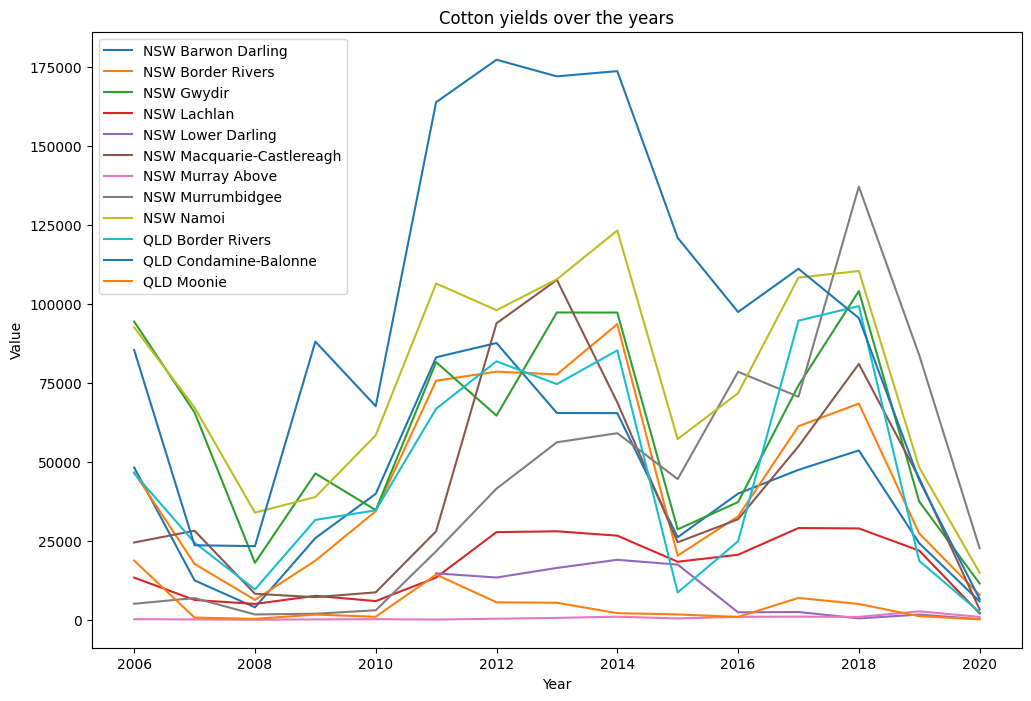

In [81]:
grouped = cotton.groupby("Region")
plt.figure(figsize = (12, 8))
for name, group in grouped:
    plt.plot(group["Year"], group["Production"], label=name)


plt.legend()
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Cotton yields over the years")
plt.show()